In [11]:
# python -m pip install SoundFile
import glob
import os
from info import i, printb, printr, printp, print
import glob
import os
import librosa
import pdb
import csv
import json
import re
import numpy as np
import random
import librosa.display
import IPython.display as ipd
from sklearn import preprocessing
from collections import Counter
from matplotlib import pyplot as plt
from info import i, printb, printr, printp, print
import muda
import jams
from sklearn import svm
import librosa
import keras
import scipy.io as sio
import io
#-----------------------------------parameters for CNN -----------------------------------#
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from keras.models import Sequential, Input, Model 
from keras.layers import Dense, Dropout, Flatten, Activation 
from keras.layers import Conv2D , MaxPooling2D
from keras.layers.normalization import BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
#-----------------------------------parameters for TTBOX -----------------------------------#
import timbre_descriptor as td
import numpy as np
import scipy as sc
import my_tools as mt
from collections import namedtuple
import scipy
import scipy.signal
from scipy.io import wavfile

import matplotlib
import swipep as swp             # used for sing le-F0 estimation
import warnings                 # used for warning removal
import time               # used performance benchmark
import librosa


from utils import get_list_samples_names, get_features_from_samples, write_Statelabels_from_beeNotBeelabels,raw_feature_fromSample, labels2binary , get_GT_labels_fromFiles, get_items2replicate, BalanceData_online, get_list_samples_name_MFCC, SVM_Classification_BeehiveSTATE , fit_and_evaluate,deep_model, plot_confusion_matrix, get_list_samples_name_TTBOX, Dense_Net, plot_accuracy_val_accuracy

In [3]:
#----------------------------------- parameters to change-----------------------------------#
block_size=1 # blocks of 1 second
thresholds=[0, 0.5]  # minimum length for nobee intervals: 0 or 5 seconds (creates one label file per threshold value)
path_audioFiles="C:\\Users\PC\python\Stage\To Bee or not to Bee_the annotated dataset"+os.sep  # path to audio files
annotations_path="C:\\Users\PC\python\Stage\To Bee or not to Bee_the annotated dataset"+os.sep # path to .lab files
path_save_audio_labels= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+os.sep  # path where to save audio segments and labels files.
#----------------------------------- parameters to change-----------------------------------#
path_workingFolder='C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+os.sep  # path where to save audio segments and labels files.
labels2read= 'state_labels'
feature = 'MFCCs20'
path_working_MFCCs20= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\MFCCs20_matrix.mat'+os.sep
path_working_TTBox= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\TTBox_matrix.mat'+os.sep
path_save_audio_MFCCs= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\MFCCs20_matrix.mat'+os.sep 
nbits = 16;
MAX_VAL = pow(2,(nbits-1)) * 1.0;
class_names= ['missing queen', 'active' ]
#----------------------------------parameter for CNN -----------------------------------------------------------#
# Set early stopping critiria
pat=5 # this is the number of epocks with no improvment after which the training will stop 
early_stopping= EarlyStopping(monitor='val_loss', patience=pat, verbose=1 )
n_folds=10
epochs=50
batch_size=145
#----------------------------------------------------------------------------------------------#
# if path doesn't exist then create one !!!
if not os.path.exists(path_save_audio_labels):
    os.makedirs(path_save_audio_labels)  

In [4]:
###load_audioFiles_saves_segments( path_audioFiles, path_save_audio_labels, block_size , thresholds, annotations_path, read_beeNotBee_annotations='yes', save_audioSegments='yes')  
# read only labels_BeeNotBee_th0.5
path_beeNotbee_labels = path_save_audio_labels + 'labels_BeeNotBee_th'+str(thresholds[1])+'.csv'
print("path_beeNotbee_labels: ",path_beeNotbee_labels)  

[2020-05-18 23:51:51 RAM60.4% 0.29GB] path_beeNotbee_labels:  C:\Users\PC\python\Stage\dataset_BeeNoBee_2_second1sec\labels_BeeNotBee_th0.5.csv


In [5]:
#### reads labels beeNotBee files and creates corresponding states label file
#### liste= write_Statelabels_from_beeNotBeelabels(path_save_audio_labels, path_beeNotbee_labels, states=['active','missing queen','swarm' ])
#------------split nobee from the path_save_audio-------------------------------
#import os
#for i in range(len(liste)):
#    os.remove(path_save_audio_labels+liste[i]+'.wav')
#liste[0]  
#--------------------------------------------------------------------------------
sample_ids=get_list_samples_names(path_save_audio_labels) # get sample ids from audio segments folder.
print(len(sample_ids) ) 
   

[2020-05-18 23:47:25 RAM61.0% 0.29GB] 17295


In [12]:
#Calculate the MFCCs20 
##### X=get_features_from_samples(path_workingFolder, sample_ids, 'MFCCs20', 'NO', 0)

# MFCCs+SVM

In [5]:
X, labels , Y , sample_idss =get_list_samples_name_MFCC(path_save_audio_MFCCs )
y_concat, x_concat, sample_ids_concat= BalanceData_online(Y, X, sample_idss)
print("Reshape the data") 
x, y, z= x_concat.shape
X=x_concat.reshape(x, y*z)
Y=y_concat
Y.shape,X.shape
print('split the dataset') 
x_train= X[4519:]
x_test=X[: 4518]
y_test=Y[:4518]
y_train= Y[4519:]
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 2020, shuffle=False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape )
CLF, Test_GroundT, Train_GroundT, Test_Preds, Train_Preds, Test_Preds_Proba, Train_Preds_Proba = SVM_Classification_BeehiveSTATE(x_train, y_train , x_test, y_test, kerneloption='rbf')
# Metrics
print("Accuracy: ", metrics.accuracy_score( Test_GroundT, Test_Preds))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Test_GroundT, Test_Preds))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Test_GroundT, Test_Preds))

[2020-05-18 23:16:59 RAM59.0% 0.42GB] (13183, 880) (4518, 880) (13183,) (4518,)
[2020-05-18 23:16:59 RAM59.0% 0.42GB] 

[2020-05-18 23:16:59 RAM59.0% 0.42GB] Starting classification with SVM:
[2020-05-18 23:16:59 RAM59.0% 0.42GB] 

[2020-05-18 23:16:59 RAM59.0% 0.42GB] classification Beehive State into : Active or Missing Queen
[2020-05-18 23:35:14 RAM61.3% 0.46GB] Accuracy:  0.749667994687915
[2020-05-18 23:35:14 RAM61.3% 0.46GB] Precision: 0.8057605332063794
[2020-05-18 23:35:14 RAM61.4% 0.46GB] Recall: 0.9148648648648648


[2020-05-18 23:39:18 RAM61.7% 0.46GB] Confusion matrix, without normalization
[2020-05-18 23:39:18 RAM61.7% 0.46GB] [[   2  816]
 [ 315 3385]]
[2020-05-18 23:39:18 RAM61.7% 0.47GB] Normalized confusion matrix
[2020-05-18 23:39:18 RAM61.7% 0.47GB] [[0.   1.  ]
 [0.09 0.91]]


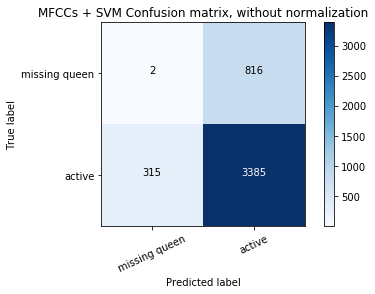

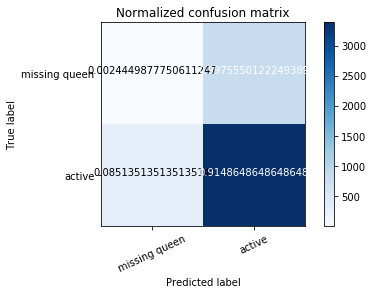

[2020-05-18 23:39:18 RAM61.8% 0.47GB] 
Clasification report MFCCs + SVM:
                precision    recall  f1-score   support

missing_queen       0.01      0.00      0.00       818
       active       0.81      0.91      0.86      3700

     accuracy                           0.75      4518
    macro avg       0.41      0.46      0.43      4518
 weighted avg       0.66      0.75      0.70      4518



In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Test_GroundT, Test_Preds )
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='MFCCs + SVM Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
target_names=['missing_queen', 'active']
print ('\nClasification report MFCCs + SVM:\n', classification_report(Test_GroundT, Test_Preds , target_names=target_names))

# MFCCs+CNN:

In [5]:
# 
X, labels , Y , sample_idss =get_list_samples_name_MFCC(path_save_audio_MFCCs )
y_concat, x_concat, sample_ids_concat= BalanceData_online(Y, X, sample_idss)
print("Reshape the data")
x, y, z= x_concat.shape
X= x_concat.reshape(-1, 20, 44, 1)
Y=y_concat.reshape(-1, 1)
print("split the dataset")  
# Convert features and corresponding classification labels into numpy arrays

X = np.array(X.tolist())
y = np.array(Y.tolist())
# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

x_train= X[4519:]
x_test=X[: 4518]
y_test=yy[:4518]
y_train= yy[4519:]
x_train.shape, x_test.shape, y_train.shape, y_test.shape
#x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.3, random_state = 2020, shuffle=False)
model=deep_model(( 20,44, 1))
model.summary()

[2020-05-18 23:52:04 RAM63.3% 0.41GB] Balancing training data:
[2020-05-18 23:52:04 RAM63.3% 0.41GB] will randomly replicate samples from least represented class
[2020-05-18 23:52:41 RAM61.7% 0.53GB] Reshape the data
[2020-05-18 23:52:41 RAM60.4% 0.42GB] split the dataset


C:\Users\PC\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 44, 16)        160       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 20, 44, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 22, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 22, 16)        2320      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 10, 22, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 11, 16)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 11, 16)        

In [17]:
# define the model check point callback -> this will keep saving the model as a physical file 
model_checkpoint= ModelCheckpoint('cnn_bee_1.h5', verbose=1, save_best_only=True )

# define a function to fit the model
def fit_and_evaluate(train_x, val_x, train_y, val_y, EPOCHS=50, BATCH_SIZE=145 ):
    model=None
    model=deep_model(( 20,44, 1))
    results= model.fit(train_x, train_y, epochs=EPOCHS, batch_size= BATCH_SIZE, callbacks=[early_stopping, model_checkpoint], verbose=1, validation_split=0.1)
    print("Val Score :", model.evaluate(val_x, val_y))
    return results 
    
# save the model history in a list after fitting so we can plot later 
model_history=[]
for i in range(n_folds):
    print("Training on Fold :", i+1)
    x_t, x_v, y_t, y_v = train_test_split(x_train, y_train, test_size=0.10, random_state = 2020)
    model_history.append(fit_and_evaluate(x_t, x_v, y_t, y_v, epochs, batch_size))
    print("============="*12, end="\n\n\n")

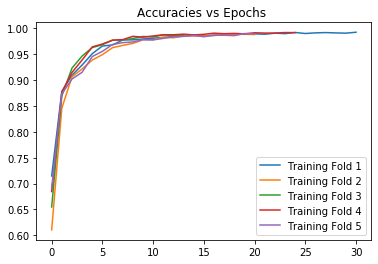

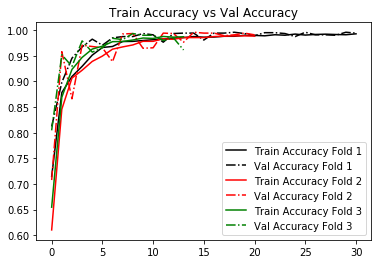

In [8]:
# Plot to see how models are performing 
plot_accuracy_val_accuracy(model_history):   

In [28]:
#Load the model that was saved by ModelCheckpoint
model = load_model('cnn_bee_1.h5')
score= model.evaluate(x_test, y_test, verbose=0)
# Predict labels: 
predicted_classes= model.predict(x_test)
predicted_classes=np.argmax(np.round(predicted_classes), axis=1)
rounded_predictions = model.predict_classes(x_test, batch_size=128, verbose=0)
rounded_labels=np.argmax(y_test, axis=1)
rounded_predictions[1], rounded_labels[1]

[2020-05-19 00:26:09 RAM75.5% 1.39GB] Confusion matrix, without normalization
[2020-05-19 00:26:09 RAM75.5% 1.39GB] [[  53  765]
 [   0 3700]]
[2020-05-19 00:26:09 RAM75.5% 1.39GB] Normalized confusion matrix
[2020-05-19 00:26:09 RAM75.5% 1.39GB] [[0.06 0.94]
 [0.   1.  ]]


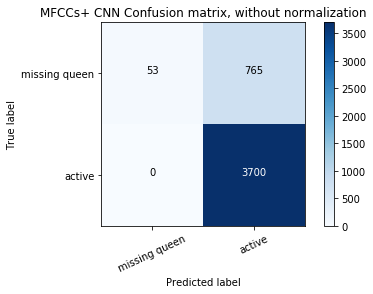

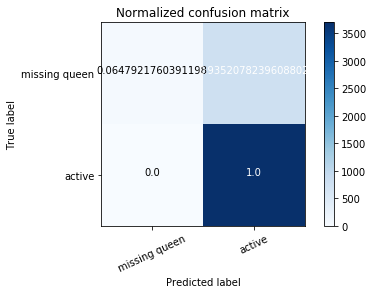

[2020-05-19 00:26:09 RAM75.5% 1.39GB] 
Clasification report MFCCs+ CNN:
                precision    recall  f1-score   support

missing_queen       1.00      0.06      0.12       818
       active       0.83      1.00      0.91      3700

     accuracy                           0.83      4518
    macro avg       0.91      0.53      0.51      4518
 weighted avg       0.86      0.83      0.76      4518



In [29]:
fig = plt.figure()
# Compute confusion matrix
cnf_matrix = confusion_matrix(rounded_labels, rounded_predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='MFCCs+ CNN Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
target_names=['missing_queen', 'active']
print ('\nClasification report MFCCs+ CNN:\n', classification_report(rounded_labels, rounded_predictions, target_names=target_names ))

# TTBOX+ SVM:

In [ ]:
#path_workingFolder_=path_workingFolder='C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_1_second'+str(block_size)+'sec'+os.sep  # path where to save a
#X_ttbox =get_features_from_samples(path_workingFolder, sample_ids, 'TTBOX', 'NO', 0)

In [4]:
path_save_audio= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\ttb_mat'+os.sep 
X_ttbox,  labels_ttbox , Y_ttbox, sample_ids_ttbox= get_list_samples_name_TTBOX(path_save_audio, extension='.mat')
y_ttbox, x_ttbox, sample_ids_concat= BalanceData_online(Y_ttbox, X_ttbox, sample_ids_ttbox)
print("Reshape the data ")
x, y, z= x_ttbox.shape
x_ttbox=x_ttbox.reshape(x, y*z)
print("split the data ")
x_train= x_ttbox[4519:]
x_test=x_ttbox[: 4518]
y_test=y_ttbox[:4518]
y_train= y_ttbox[4519:]
CLF, Test_GroundT, Train_GroundT, Test_Preds, Train_Preds, Test_Preds_Proba, Train_Preds_Proba = SVM_Classification_BeehiveSTATE(x_train, y_train , x_test, y_test, kerneloption='rbf')
print("Accuracy: ", metrics.accuracy_score( Test_GroundT, Test_Preds))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Test_GroundT, Test_Preds))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Test_GroundT, Test_Preds))


[2020-05-19 00:42:56 RAM62.8% 0.32GB] Balancing training data:
[2020-05-19 00:42:56 RAM62.8% 0.32GB] will randomly replicate samples from least represented class
[2020-05-19 00:43:04 RAM62.2% 0.34GB] Reshape the data 
[2020-05-19 00:43:04 RAM62.2% 0.34GB] split the data 
[2020-05-19 00:43:04 RAM62.2% 0.34GB] 

[2020-05-19 00:43:04 RAM62.2% 0.34GB] Starting classification with SVM:
[2020-05-19 00:43:04 RAM62.2% 0.34GB] 

[2020-05-19 00:43:04 RAM62.2% 0.34GB] classification Beehive State into : Active or Missing Queen
[2020-05-19 00:46:23 RAM59.9% 0.35GB] Accuracy:  0.7470119521912351
[2020-05-19 00:46:23 RAM59.9% 0.35GB] Precision: 0.9229242474363215
[2020-05-19 00:46:23 RAM59.9% 0.35GB] Recall: 0.754054054054054


[2020-05-19 00:46:59 RAM61.0% 0.35GB] Confusion matrix, without normalization
[2020-05-19 00:46:59 RAM61.0% 0.35GB] [[ 585  233]
 [ 910 2790]]
[2020-05-19 00:46:59 RAM61.0% 0.35GB] Normalized confusion matrix
[2020-05-19 00:46:59 RAM61.0% 0.35GB] [[0.72 0.28]
 [0.25 0.75]]


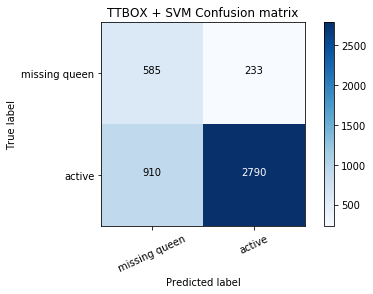

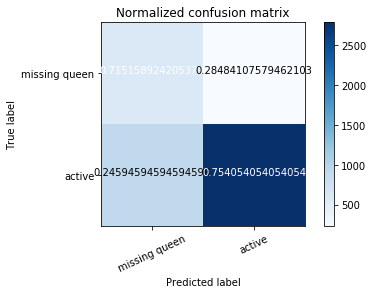

[2020-05-19 00:46:59 RAM61.1% 0.36GB] 
Clasification report TTBOX + SVM:
                precision    recall  f1-score   support

missing_queen       0.39      0.72      0.51       818
       active       0.92      0.75      0.83      3700

     accuracy                           0.75      4518
    macro avg       0.66      0.73      0.67      4518
 weighted avg       0.83      0.75      0.77      4518



In [5]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Test_GroundT, Test_Preds )
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='TTBOX + SVM Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
target_names=['missing_queen', 'active']
print ('\nClasification report TTBOX + SVM:\n', classification_report(Test_GroundT, Test_Preds , target_names=target_names))

# TTBOX+CNN: 

In [6]:
path_save_audio= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\ttb_mat'+os.sep 
X_ttbox,  labels_ttbox , Y_ttbox, sample_ids_ttbox= get_list_samples_name_TTBOX(path_save_audio, extension='.mat')
y_ttbox, x_ttbox, sample_ids_concat= BalanceData_online(Y_ttbox, X_ttbox, sample_ids_ttbox)
print("Reshape the data ")
X_ttbox= x_ttbox.reshape(-1, 1, 164, 1)
Y_ttbox=y_ttbox.reshape(-1, 1)
print("split the data ")
# Convert features and corresponding classification labels into numpy arrays
X_ttbox = np.array(X_ttbox.tolist())
Y_ttbox = np.array(Y_ttbox.tolist())
# Encode the classification labels
te = LabelEncoder()
y_ttbox = to_categorical(te.fit_transform(Y_ttbox)) 
# split the dataset 
train_x= X_ttbox[4519:]
test_x=X_ttbox[: 4518]
test_y=y_ttbox[:4518]
train_y= y_ttbox[4519:]
model1= deep_model((1, 164, 1))
model1.summary()

[2020-05-19 00:47:14 RAM61.1% 0.36GB] Balancing training data:
[2020-05-19 00:47:14 RAM61.1% 0.36GB] will randomly replicate samples from least represented class
[2020-05-19 00:47:22 RAM61.1% 0.39GB] Reshape the data 
[2020-05-19 00:47:22 RAM60.8% 0.36GB] split the data 


C:\Users\PC\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 164, 16)        160       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 164, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 82, 16)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 82, 16)         2320      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1, 82, 16)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 41, 16)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 41, 16)        

In [18]:
# Set early stopping critiria
pat=5 # this is the number of epocks with no improvment after which the training will stop 
early_stopping= EarlyStopping(monitor='val_loss', patience=pat, verbose=1 )
# define the model check point callback -> this will keep saving the model as a physical file 
model_checkpoint= ModelCheckpoint('ttbox_deep_model.h5', verbose=1, save_best_only=True )
# define a function to fit the model
def fit_and_evaluate(train_x, val_x, train_y, val_y, EPOCHS=50, BATCH_SIZE=145 ):
    model=None
    model=deep_model((1, 164,1))
    results= model.fit(train_x, train_y, epochs=EPOCHS, batch_size= BATCH_SIZE, callbacks=[early_stopping, model_checkpoint], verbose=1, validation_split=0.1)
    print("Val Score :", model.evaluate(val_x, val_y))
    return results 
# save the model history in a list after fitting so we can plot later 
model_history=[]
for i in range(n_folds):
    print("Training on Fold :", i+1)
    x_t, x_v, y_t, y_v = train_test_split(train_x, train_y, test_size=0.10, random_state = 2020)
    model_history.append(fit_and_evaluate(x_t, x_v, y_t, y_v, epochs, batch_size))
    print("============="*12, end="\n\n\n")

In [8]:
model1 = load_model('ttbox_deep_model.h5')
model1.evaluate(test_x, test_y, verbose=1)
predicted_classes= model1.predict(test_x)
predicted_classes=np.argmax(np.round(predicted_classes), axis=1)
rounded_predictions = model1.predict_classes(test_x, batch_size=128, verbose=0)
rounded_labels=np.argmax(test_y, axis=1)

4518/4518 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 129us/step


[2020-05-19 00:58:25 RAM63.4% 0.74GB] Confusion matrix, without normalization
[2020-05-19 00:58:25 RAM63.4% 0.74GB] [[ 778   40]
 [ 251 3449]]
[2020-05-19 00:58:25 RAM63.4% 0.74GB] Normalized confusion matrix
[2020-05-19 00:58:25 RAM63.4% 0.74GB] [[0.95 0.05]
 [0.07 0.93]]


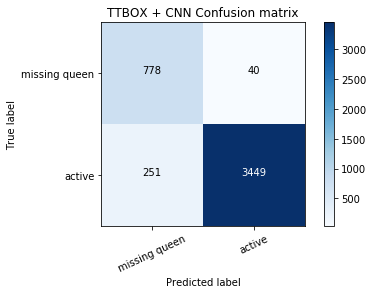

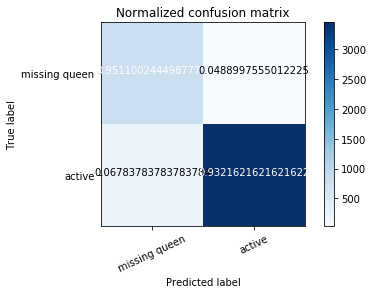

[2020-05-19 00:58:25 RAM63.4% 0.74GB] 
Clasification report TTBOX+ CNN:
                precision    recall  f1-score   support

missing_queen       0.76      0.95      0.84       818
       active       0.99      0.93      0.96      3700

     accuracy                           0.94      4518
    macro avg       0.87      0.94      0.90      4518
 weighted avg       0.95      0.94      0.94      4518



In [9]:
fig = plt.figure()
# Compute confusion matrix
cnf_matrix = confusion_matrix(rounded_labels, rounded_predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='TTBOX + CNN Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
target_names=['missing_queen', 'active']
print ('\nClasification report TTBOX+ CNN:\n', classification_report(rounded_labels, rounded_predictions, target_names=target_names ))

# MFCCs +DenseNet

In [12]:
path_save_audio= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\ttb_mat'+os.sep 
X_ttbox,  labels_ttbox , Y_ttbox, sample_ids_ttbox= get_list_samples_name_TTBOX(path_save_audio, extension='.mat')
y_ttbox, x_ttbox, sample_ids_concat= BalanceData_online(Y_ttbox, X_ttbox, sample_ids_ttbox)
X_ttbox= x_ttbox.reshape(-1, 164, 1)
Y_ttbox=y_ttbox.reshape(-1, 1)
# Convert features and corresponding classification labels into numpy arrays
X_ttbox = np.array(X_ttbox.tolist())
Y_ttbox = np.array(Y_ttbox.tolist())
# Encode the classification labels
te = LabelEncoder()
y_ttbox = to_categorical(te.fit_transform(Y_ttbox)) 
# split the dataset 
# split the dataset 
train_x= X_ttbox[4519:]
test_x=X_ttbox[: 4518]
test_y=y_ttbox[:4518]
train_y= y_ttbox[4519:]
model2= Dense_Net((164, 1))
model2.summary()

[2020-05-19 00:59:54 RAM65.1% 0.77GB] Balancing training data:
[2020-05-19 00:59:54 RAM65.1% 0.77GB] will randomly replicate samples from least represented class
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 164)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 328)               54120     
_________________________________________________________________
activation_1 (Activation)    (None, 328)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 328)               1312      
_________________________________________________________________
dropout_23 (Dropout)         (None, 328)               0         
_________________________________________________________________
dense_35 (Dense)       

In [19]:
# Set early stopping critiria
pat=5 # this is the number of epocks with no improvment after which the training will stop 
early_stopping= EarlyStopping(monitor='val_loss', patience=pat, verbose=1 )

# define the model check point callback -> this will keep saving the model as a physical file 
model_checkpoint= ModelCheckpoint('DenseNet_bee_1.h5', verbose=1, save_best_only=True )

# define a function to fit the model

def fit_and_evaluate(train_x, val_x, train_y, val_y, EPOCHS=50, BATCH_SIZE=145 ):
    model=None
    model=Dense_Net(( 164,1 ))
    results= model.fit(train_x, train_y, epochs=EPOCHS, batch_size= BATCH_SIZE, callbacks=[early_stopping, model_checkpoint], verbose=1, validation_split=0.1)
    print("Val Score :", model.evaluate(val_x, val_y))
    return results 
# save the model history in a list after fitting so we can plot later 
model_history=[]
for i in range(n_folds):
    print("Training on Fold :", i+1)
    x_t, x_v, y_t, y_v = train_test_split(train_x, train_y, test_size=0.1, random_state = 2020)
    model_history.append(fit_and_evaluate(x_t, x_v, y_t, y_v, epochs, batch_size))
    print("============="*12, end="\n\n\n")

In [14]:
model2 = load_model('DenseNet_bee_1.h5')
model2.evaluate(test_x, test_y, verbose=1)
# Predict labels: 
predicted_classes= model2.predict(test_x)

predicted_classes=np.argmax(np.round(predicted_classes), axis=1)
rounded_predictions = model2.predict_classes(test_x, batch_size=128, verbose=0)
rounded_labels=np.argmax(test_y, axis=1)

4518/4518 [==============================] - ETA: 13 - ETA: 0 - ETA:  - ETA:  - ETA:  - ETA:  - 0s 88us/step


[2020-05-19 01:03:39 RAM71.9% 1.27GB] Confusion matrix, without normalization
[2020-05-19 01:03:39 RAM71.9% 1.27GB] [[ 691  127]
 [ 120 3580]]
[2020-05-19 01:03:39 RAM71.9% 1.28GB] Normalized confusion matrix
[2020-05-19 01:03:39 RAM71.9% 1.28GB] [[0.84 0.16]
 [0.03 0.97]]


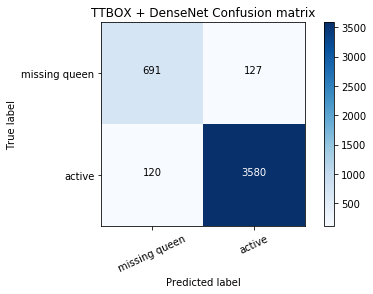

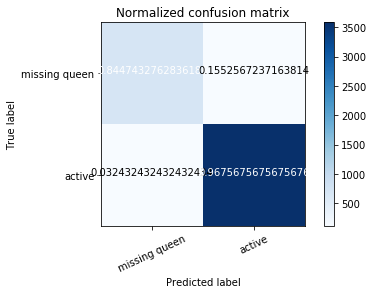

[2020-05-19 01:03:39 RAM71.9% 1.28GB] 
Clasification report TTBOX+ DenseNet:
                precision    recall  f1-score   support

missing_queen       0.85      0.84      0.85       818
       active       0.97      0.97      0.97      3700

     accuracy                           0.95      4518
    macro avg       0.91      0.91      0.91      4518
 weighted avg       0.95      0.95      0.95      4518



In [15]:
fig = plt.figure()
# Compute confusion matrix
cnf_matrix = confusion_matrix(rounded_labels, rounded_predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='TTBOX + DenseNet Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
target_names=['missing_queen', 'active']
print ('\nClasification report TTBOX+ DenseNet:\n', classification_report(rounded_labels, rounded_predictions, target_names=target_names ))